In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# Load dataset
data = pd.read_csv('ECS171_FINAL_DATASET.csv')

# Split dataset
X = data.drop('Revenue', axis=1)
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5866450391997837
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.56      0.70      3124
           1       0.23      0.73      0.36       575

    accuracy                           0.59      3699
   macro avg       0.58      0.65      0.53      3699
weighted avg       0.81      0.59      0.64      3699

Confusion Matrix:
 [[1748 1376]
 [ 153  422]]


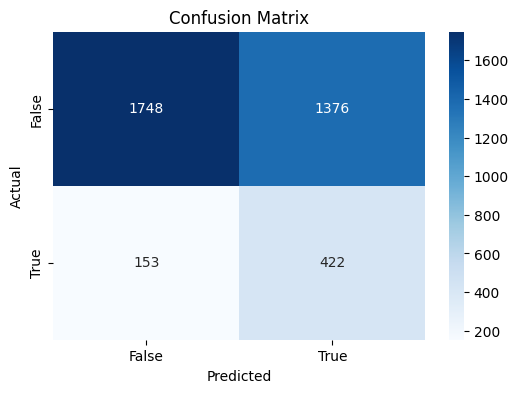

In [7]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


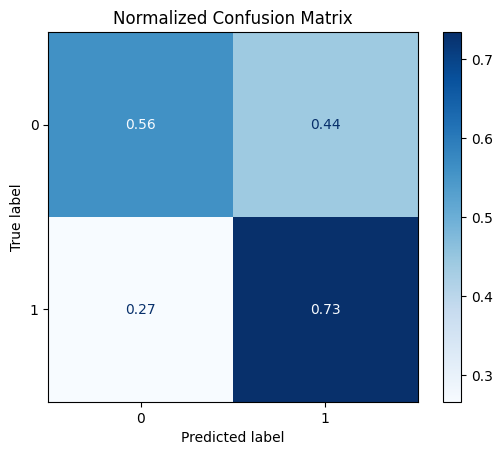

In [8]:
# Display normalized confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Blues", normalize="true", colorbar=True
)
plt.title("Normalized Confusion Matrix")
plt.show()